# Importing libraries


In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


# Setting dataframes



In [3]:
df1= pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv")


In [4]:
datasets = [df1,df2,df3,df4,df5,df6,df7,df8]

In [5]:
print("Different type of Attacks on Server")
for index, dataset in enumerate(datasets):
    print(f"{index}: {dataset[' Label'].unique()}")

Different type of Attacks on Server
0: ['BENIGN' 'DDoS']
1: ['BENIGN' 'PortScan']
2: ['BENIGN' 'Bot']
3: ['BENIGN']
4: ['BENIGN' 'Infiltration']
5: ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
6: ['BENIGN' 'FTP-Patator' 'SSH-Patator']
7: ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [6]:
df=pd.concat([df1,df2,df3,df5,df6,df7,df8],join="inner")


In [7]:
df[" Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [8]:
x = df[" Label"]

In [9]:
len(x)

2300825

In [10]:
#  Remove missing values from a DataFrame
df = df.dropna()

In [11]:
df.shape

(2299531, 79)

In [12]:
x = df[" Label"]

In [13]:
x

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2299531, dtype: object

In [14]:
arr = x

In [15]:
x.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

## Grouping different attacks.

In [16]:
conditions = [
    df[' Label'].isin(["DDoS", "DoS slowloris", "DoS Slowhttptest", "DoS Hulk", "DoS GoldenEye"]),
    df[' Label'].isin(["Web Attack � Brute Force", "Web Attack � XSS", "Web Attack � Sql Injection"]),
    df[' Label'].isin(['FTP-Patator', 'SSH-Patator']),
]

choices = ['DosFam', 'WebAttack', 'Patator']

# Apply conditions to the 'Label' column
df[' Label'] = np.select(conditions, choices, default=df[' Label'])

# Display the modified DataFrame
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
df[' Label'].unique()

array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

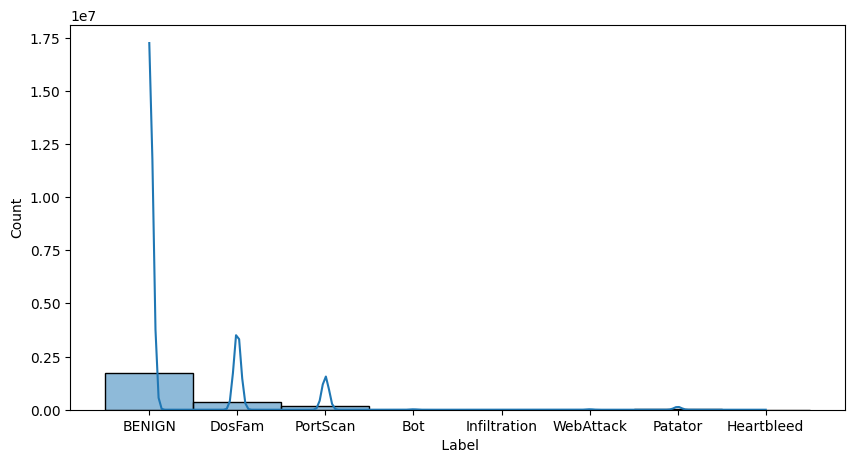

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x=" Label",kde=True)

<Axes: xlabel=' Label', ylabel='count'>

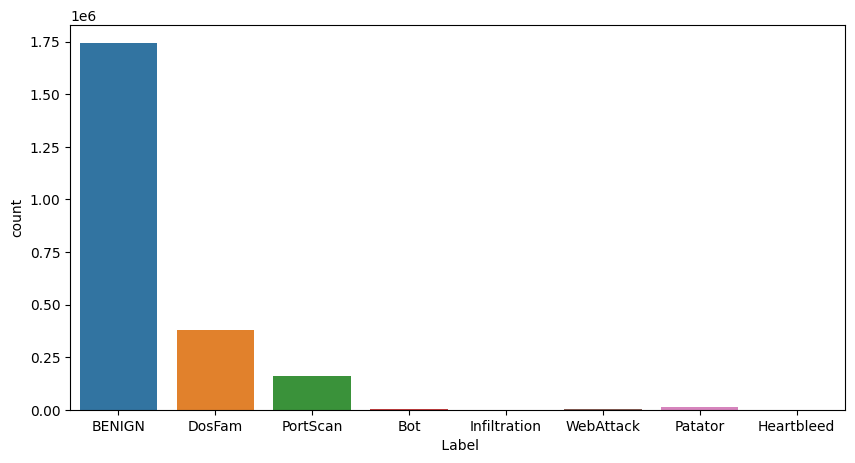

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x=" Label")

In [20]:
label_percentages = df[' Label'].value_counts(normalize=True) * 100
print(label_percentages)

 Label
BENIGN          75.790846
DosFam          16.513759
PortScan         6.911409
Patator          0.601644
WebAttack        0.094802
Bot              0.085496
Infiltration     0.001566
Heartbleed       0.000478
Name: proportion, dtype: float64


In [21]:
df_attack = df.copy()

In [22]:
df[' Label'].unique()

array(['BENIGN', 'DosFam', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'Patator', 'Heartbleed'], dtype=object)

## Grouping into 2 labels which are ATTACK and BENIGN

In [23]:
cond = [
    df_attack[' Label'].isin(["DosFam", "PortScan", "Patator", "WebAttack", "Bot","Infiltration","Heartbleed"]),
]

choic = ['Attack']

# Apply conditions to the 'Label' column
df_attack[' Label'] = np.select(cond, choic, default=df_attack[' Label'])

# Display the modified DataFrame
df_attack.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

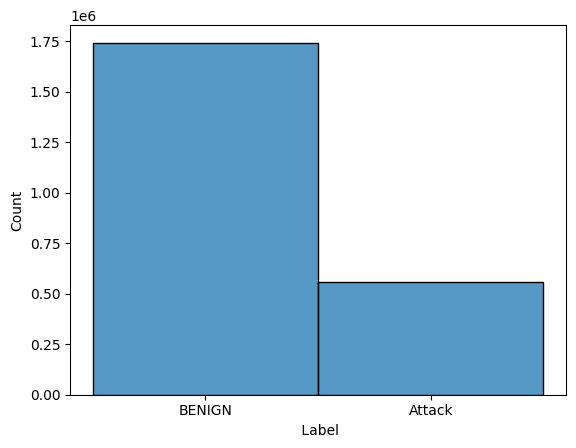

In [24]:
sns.histplot(data=df_attack,x=" Label")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Label', ylabel='Count'>

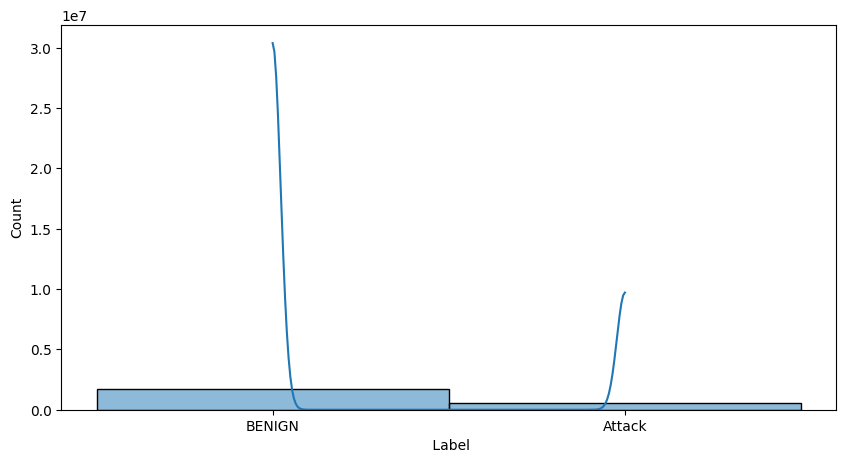

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_attack,x=" Label",kde=True)

In [25]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Checking if there are any missing values

In [28]:
print(df_attack[" Label"].isna().sum())

0


### Replacing infinity and negative infinity with NaN (Not a Number)

In [29]:
df_attack.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
df_attack

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Encoding the Labels


In [31]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categories to encoded labels
encoded_labels = label_encoder.fit_transform(df_attack[' Label'])

print("Encoded Labels:", encoded_labels)
# Reverse the encoded labels back to original categories
original_labels = label_encoder.inverse_transform(encoded_labels)

print("Original Labels:", original_labels)
df_attack[' Label'] =encoded_labels

Encoded Labels: [1 1 1 ... 1 1 1]
Original Labels: ['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']


In [97]:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Attack': 0, 'BENIGN': 1}


In [32]:
df_attack[' Label'].unique()

array([1, 0])

# Applying Standardization
1. Subtracts the mean and
2. Divides by the standard deviation
3. So that each numeric feature ends up with mean ~ 0 and standard deviation ~ 1

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric data and transform it
numeric_columns = df_attack.drop([' Label'],axis=1).columns
df_attack[numeric_columns] = scaler.fit_transform(df_attack[numeric_columns])

print("Dataset after Standardization:")
df_attack.head()

Dataset after Standardization:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.717684,-0.456677,-0.009998,-0.010646,-0.050716,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
1,2.728523,-0.456674,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
2,2.728580,-0.456675,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
3,2.222795,-0.456676,-0.011401,-0.009596,-0.051278,-0.007307,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1
4,2.717569,-0.456677,-0.009998,-0.010646,-0.050716,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.12781,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,1


In [34]:
df_attack = df_attack.dropna()

## Splitting into training set and test set

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = df_attack.drop([" Label"],axis=1)
y = df_attack[" Label"]
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(df_attack.drop([" Label"],axis=1))
print("Number of components chosen:", pca.n_components_)
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)


Number of components chosen: 25


## Layers of the neural network model

In [36]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Activation
model = Sequential(
    [
        Dense(64,input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(16),
        BatchNormalization(),
        Activation('tanh'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,041 (11.88 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 160 (640.00 B)

### Compiling the model

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Training the model

In [39]:
history = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9039 - loss: 0.2245 - val_accuracy: 0.9544 - val_loss: 0.1123
Epoch 2/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9414 - loss: 0.1413 - val_accuracy: 0.9445 - val_loss: 0.1248
Epoch 3/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9451 - loss: 0.1317 - val_accuracy: 0.9476 - val_loss: 0.1178
Epoch 4/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9457 - loss: 0.1291 - val_accuracy: 0.9478 - val_loss: 0.1098
Epoch 5/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9471 - loss: 0.1259 - val_accuracy: 0.9552 - val_loss: 0.1012
Epoch 6/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9469 - loss: 0.1246 - val_accuracy: 0.9586 - val_loss: 0.0925
Epoch 7/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9478 - loss: 0.1229 - val_accuracy: 0.9521 - val_loss: 0.1106
Epoch 8/20
6436/6436 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9480 - loss: 0

# confusion matrix

21548/21548 ━━━━━━━━━━━━━━━━━━━━ 17s 776us/step


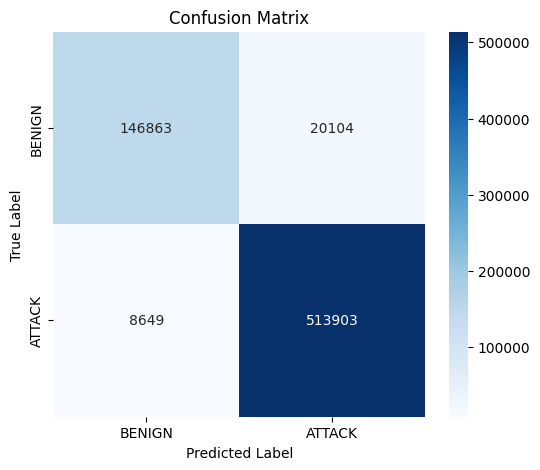

In [40]:
from sklearn.metrics import confusion_matrix
# Predict and convert probabilities to class labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Optional: define class labels
labels = ['BENIGN', 'ATTACK']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# Comparison with decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p = dt.predict(X_test)

In [72]:
class_predictions = (y_p >= 0.5).astype(int)

In [73]:
class_predictions

array([0, 1, 1, ..., 1, 0, 0])

In [74]:
y_test

148381    0
295349    1
636529    1
472228    1
356340    1
         ..
253495    0
163627    1
190502    1
107445    0
19844     0
Name:  Label, Length: 689519, dtype: int64

In [96]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(comparison_df.head(20))

        Actual  Predicted
148381       0          0
295349       1          1
636529       1          1
472228       1          1
356340       1          1
467043       1          1
138573       0          0
112530       0          0
14859        1          1
56703        1          1
240150       0          0
83098        1          1
86044        0          0
512975       1          1
249096       1          1
123971       0          0
193450       1          1
129417       1          1
85467        1          1
251969       0          0


In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, class_predictions))
print("\nClassification Report:\n", classification_report(y_test, class_predictions))

Accuracy: 0.9978970847793897

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166967
           1       1.00      1.00      1.00    522552

    accuracy                           1.00    689519
   macro avg       1.00      1.00      1.00    689519
weighted avg       1.00      1.00      1.00    689519



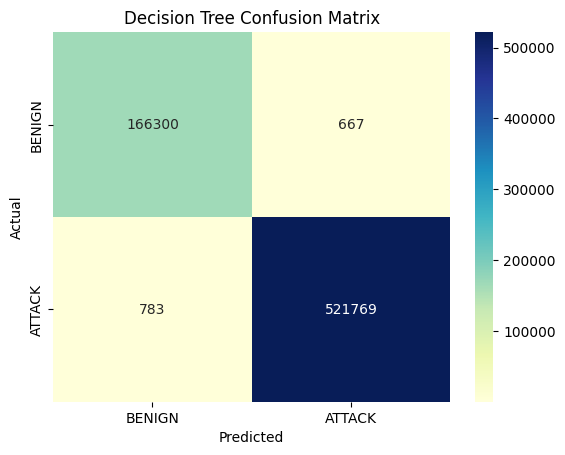

In [76]:
cm = confusion_matrix(y_test, class_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['BENIGN', 'ATTACK'], yticklabels=['BENIGN', 'ATTACK'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Saving the decision tree model

In [77]:
import joblib

# Save the model
joblib.dump(dt, 'decision_tree_model.pkl')

# Later, load the model
dt_loaded = joblib.load('decision_tree_model.pkl')

# Predict with the loaded model
y_loaded_pred = dt_loaded.predict(X_test)


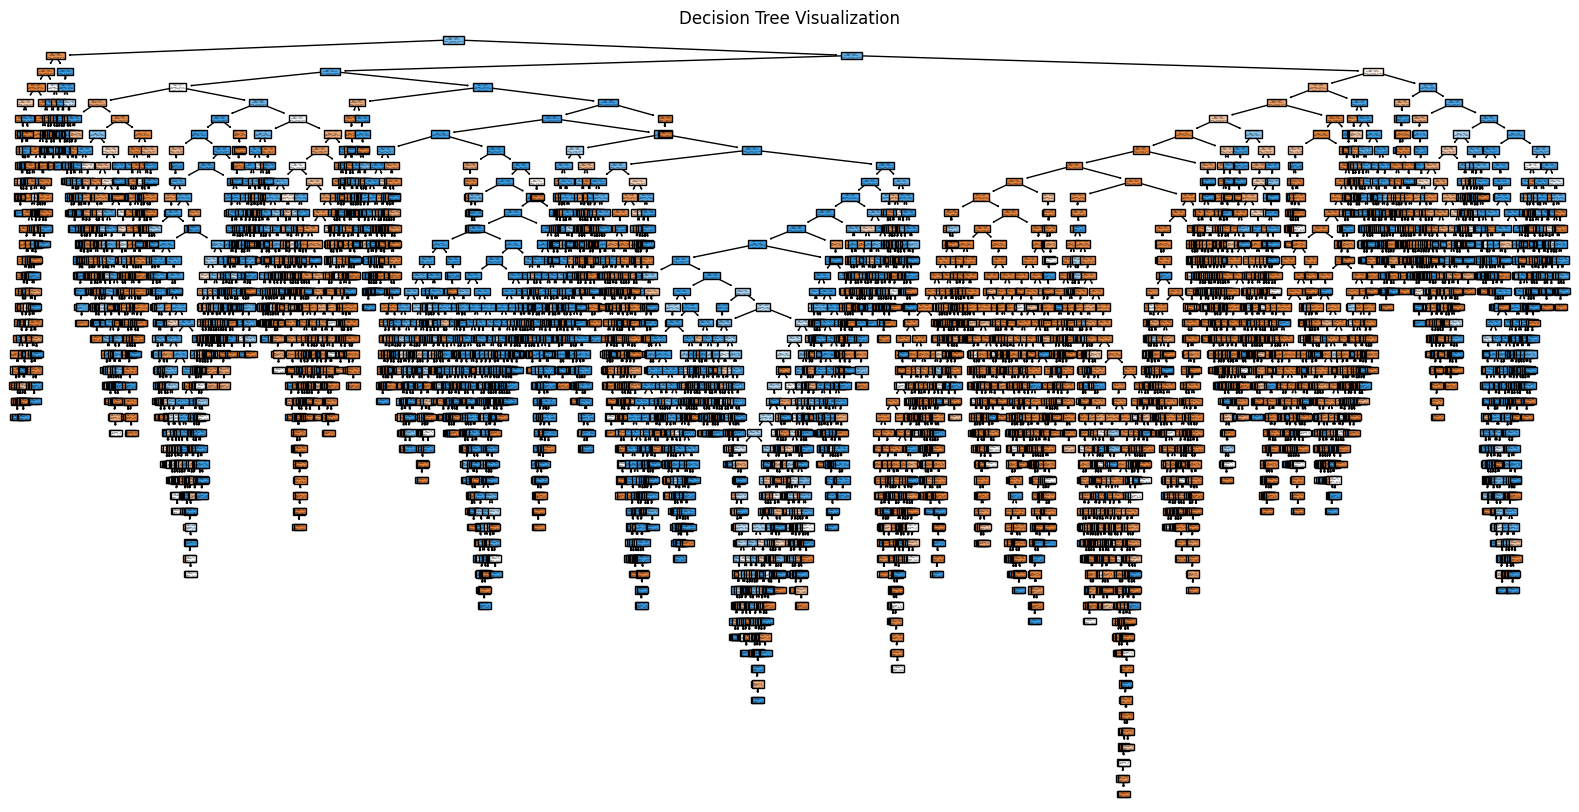

In [78]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Adjust size as needed
plot_tree(dt, filled=True, feature_names=[f'PC{i}' for i in range(X_train.shape[1])], class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree_plot.png")  # Save as PNG
plt.show()

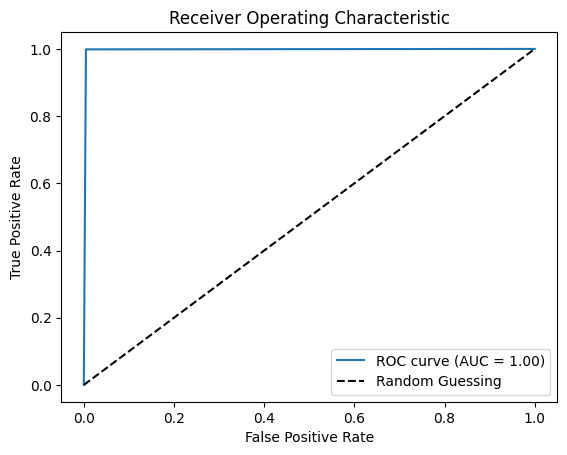

In [79]:
y_p = dt.predict(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(class_predictions, y_test)

# Compute AUC
auc = roc_auc_score(class_predictions, y_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving the model


In [81]:
from joblib import dump
dump(scaler,'scaler.joblib')
dump(pca,'pca.joblib')
model.save('my_model.h5')

In [82]:
y_train

226862    0
504401    1
24178     1
167388    1
8355      1
         ..
266213    1
126543    0
200236    1
249360    1
153520    1
Name:  Label, Length: 1608876, dtype: int64

In [83]:
y_test

148381    0
295349    1
636529    1
472228    1
356340    1
         ..
253495    0
163627    1
190502    1
107445    0
19844     0
Name:  Label, Length: 689519, dtype: int64

In [84]:
filtered_df = df_attack[df_attack[' Label'] == 0]


In [85]:
filtered_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,-0.424337,-0.419298,-0.008595,-0.003297,-0.049405,-0.001930,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18884,-0.424337,-0.328940,-0.007193,-0.010646,-0.049592,-0.007310,-0.268388,-0.191285,-0.267559,-0.235583,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18885,-0.424337,-0.425373,-0.008595,-0.004347,-0.049405,-0.001933,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0
18886,-0.424337,1.855562,-0.001582,-0.006447,-0.046595,-0.001933,-0.250109,-0.284113,-0.262599,-0.216968,...,0.002182,-0.126392,-0.103604,-0.150299,-0.102295,1.178638,8.730398,2.325245,-0.036798,0
18887,-0.424337,-0.438110,-0.008595,-0.004347,-0.049405,-0.001930,-0.250109,-0.284113,-0.254334,-0.201809,...,0.002182,-0.127810,-0.103604,-0.151215,-0.103877,-0.372558,-0.114784,-0.377913,-0.358824,0


In [86]:
filtered = filtered_df.head(10)

In [87]:
filtered.to_csv('filtered.csv', index=False)


In [88]:
t = pd.read_csv('filtered.csv')

In [89]:
t.shape

(10, 79)

In [90]:
t = t.drop([" Label"],axis=1)

In [91]:
import joblib
import tensorflow as tf
scaler = joblib.load("scaler.joblib")
pca = joblib.load("pca.joblib")

# Load the trained neural network
model = tf.keras.models.load_model("my_model.h5")

In [92]:

    
    # Apply PCA transformation
data_pca = pca.transform(t)
    
    # Make predictions (output is the probabilities for each class)
predictions = model.predict(data_pca)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [93]:
predictions

array([[9.0515390e-02],
       [4.3733662e-01],
       [1.5232860e-01],
       [1.8497459e-04],
       [2.5363518e-02],
       [1.0937618e-03],
       [2.5057139e-02],
       [1.0233088e-04],
       [3.4036136e-03],
       [1.6845504e-03]], dtype=float32)

In [94]:
class_predictions = (predictions >= 0.5).astype(int)


In [95]:
class_predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])